### We will be working on a classification problem.We have to classify these particular isntances where in we will have to classify the objects as Mines or Rocks.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('sonar.all-data.csv',header = None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
dataset.info()
# We do not have any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

In [5]:
dataset.shape
## We have 260 instances of the data and 60 attributes.

(208, 61)

In [6]:
# Now we will be checking if the dataset is balanced or not.
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

###### It appears that the dataset is balanced.

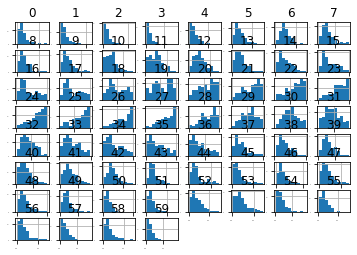

In [7]:
# Now we will visualize the dataset to better understand the dataset.
import matplotlib.pyplot as plt
%matplotlib inline
dataset.hist(xlabelsize =1, ylabelsize = 1,sharex= False, sharey= False)
plt.show()

###### It appears that most of the attributes are either unimodal or exponentially distributed.

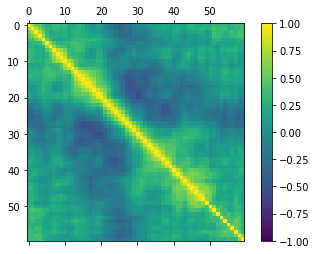

In [8]:
# Now we will check the correlation b/w the different variables.
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),vmin =-1,vmax = 1,)
fig.colorbar(cax)


In [9]:
# It can be observed that there is positive as well as negative correlation.

In [10]:
## Now we will split the dataset in training set and testing set.
from sklearn.model_selection import train_test_split
X = dataset.drop(60,axis = 1)
y = dataset[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Now we will check which of the models will work best on our dataset.
 We will use the following algorithms:
* Logistic Regression
* LDA
* CART
* SVM
* Gaussian Naive Bayes
* KNN

All the algorthims will be checked on their default parameters.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVC',SVC()))
models.append(('GNB',GaussianNB()))

In [12]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('GNB', GaussianNB())]

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results =[]
names = []
for name, model in models:
    kfold = KFold(n_splits = 10,random_state = 7,shuffle = True)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.756667 (0.083881)
LDA: 0.682381 (0.088039)
KNN: 0.715238 (0.090921)
CART: 0.716190 (0.092268)
SVC: 0.755714 (0.140376)
GNB: 0.683333 (0.131316)


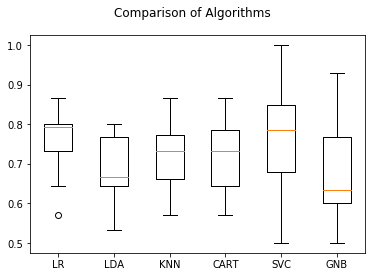

In [14]:
#We can visualize our results for better understanding.
fig = plt.figure()
fig.suptitle("Comparison of Algorithms")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
## We can standardise the data to further enhance the performance of the model.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines = []
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('GBM',GaussianNB())])))
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA',Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('GBM',DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC',Pipeline([('Scaler',StandardScaler()),('SVC',SVC())])))

In [16]:
names=[]
results = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, shuffle=True, random_state=101)
    cv_results = cross_val_score(model,X_train,y_train,cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f %f" % (name,cv_results.mean(),cv_results.std())
    print(msg)

ScaledNB: 0.696190 0.057412
ScaledLR: 0.726190 0.115553
ScaledLDA: 0.678571 0.128311
ScaledKNN: 0.801429 0.102110
ScaledCART: 0.751429 0.099381
ScaledSVC: 0.800952 0.107640


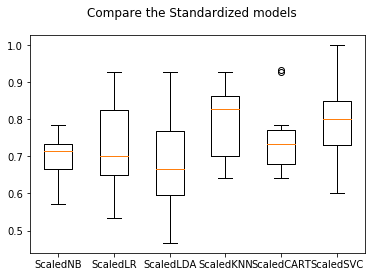

In [17]:
fig = plt.figure()
fig.suptitle('Compare the Standardized models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###### As we can see the standardization of data has further improved the performance of the model.
###### SVM and KNN are the best performing models after the standardization of the data.
###### We will now change the default parameters and try to further boost the performance of the models.

### Tuning KNN

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10,random_state =101,shuffle = True)
grid = GridSearchCV(estimator = model,param_grid = param_grid,scoring = 'accuracy',cv=kfold)
result = grid.fit(rescaledX,y_train)
print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: 0.822381 using {'n_neighbors': 1}


### Tuning SVM

In [20]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.0]
kernel_values= ['rbf','sigmoid','poly','linear']
param_grid = dict(C=c_values,kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10,random_state=70,shuffle = True)
grid = GridSearchCV(estimator = model,param_grid=param_grid,scoring= 'accuracy',cv=kfold)
result=grid.fit(rescaledX,y_train)
print("Best %f using %s" % (result.best_score_,result.best_params_))

Best 0.861905 using {'C': 1.7, 'kernel': 'rbf'}


## Ensembling Methods
Now we will use ensembling methods to boost the performance of our model using Bagging and Boosting Methods.
* ADA Boost
* Gradient Boosting
* Random Forests
* Extra Trees


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles = []
ensembles.append(("AB",AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(("RF",RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))
names = []
results = []
for name, model in ensembles:
    kfold = KFold(n_splits=10,shuffle=True, random_state=87)
    cv_results= cross_val_score(model,X_train,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f %   f" % (name,cv_results.mean(),cv_results.std())
    print(msg)

AB: 0.786667  0.091443
GBM: 0.793333  0.095931
RF: 0.795238  0.102220
ET: 0.883333  0.100210


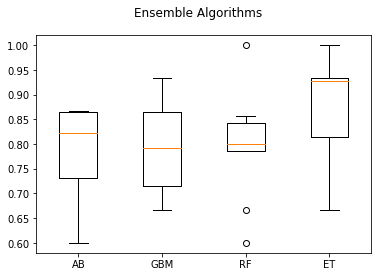

In [22]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Finalizing the model

* As  SVM was found to be the most accurate model we will train the model using the complete dataset. 
* SVM performs best on a standardized dataset so will standardize the complete dataset and transform it.
* After this we will calculate the accuracy of the model using the validation data set.
* We will check the accurcy of the model using classification report.


In [27]:
from sklearn.metrics import accuracy_score,classification_report
scaler = StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model = SVC(C=1.7)
model.fit(rescaledX,y_train)
rescaledtestX= scaler.transform(X_test)
predictions = model.predict(rescaledtestX)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

0.9047619047619048
              precision    recall  f1-score   support

           M       0.91      0.91      0.91        35
           R       0.89      0.89      0.89        28

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.90      0.90      0.90        63



In [28]:
print(model.fit)

<bound method BaseLibSVM.fit of SVC(C=1.7)>
